In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
#!pip install num2words
from num2words import num2words
#!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split and cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD

In [125]:
train = pd.read_csv('data.csv',encoding='ISO-8859-1')

In [126]:
#train = train.dropna()
#test = test.dropna()

In [127]:
#df.to_csv('data.csv')

In [128]:
train.head()

,Unnamed: 0,Type,Posts,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,O,http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,O,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
train = train[['Type','Posts']]

In [130]:
train = train[0:2500]

In [131]:
train_data = train
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Type    2500 non-null   object
 1   Posts   2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


<AxesSubplot:xlabel='Type', ylabel='count'>

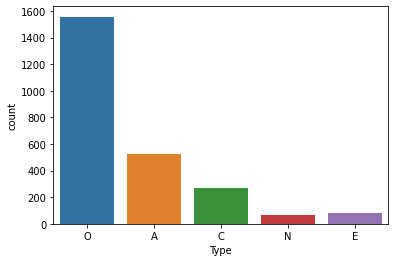

In [132]:
sns.countplot(x='Type',data=train_data)

In [11]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_data['Type']= label_encoder.fit_transform(train_data['Type'])

In [12]:
X, y = train.drop('Type', axis = 1),  train['Type']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

In [14]:
# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# Comparison of sizes of training set, validation set and test set
values = np.array([len(data_train), len(data_val), len(data_test)])
labels = ['Training set', 'Validation Set', 'Test set']

In [15]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

In [16]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is a FUNCTION that CoNvErTs a Text to lowercase"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is a FUNCTION that CoNvErTs a Text to lowercase
Output: this is a function that converts a text to lowercase


In [17]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print("Input: {}".format(text))
print("Output: {}".format(remove_whitespace(text)))

Input:  	 This is a string 	 
Output: This is a string


In [18]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? punctuations!!!!"
print("Input: {}".format(text))
print("Output: {}".format(remove_punctuation(text)))

Input: Here's [an] example? {of} &a string. with.? punctuations!!!!
Output: Here's an example of a string with punctuations


In [19]:
# Removing HTML tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>'
print("Input: {}".format(text))
print("Output: {}".format(remove_html(text)))

Input: <a href = "https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification"> Ecommerce Text Classification </a>
Output:  Ecommerce Text Classification 


In [20]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print("Input: {}".format(text))
print("Output: {}".format(remove_emoji(text)))

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [21]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print("Input: {}".format(text))
print("Output: {}".format(remove_http(text)))

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


In [22]:
# Dictionary of acronyms
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

print("Example: Original form of the acronym 'fyi' is '{}'".format(acronyms_dict['fyi']))

Example: Original form of the acronym 'fyi' is 'for your information'


In [23]:
# Dataframe of acronyms
pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original']).head()

,acronym,original
0,aka,also known as
1,asap,as soon as possible
2,brb,be right back
3,btw,by the way
4,dob,date of birth


In [24]:
# List of acronyms
acronyms_list = list(acronyms_dict.keys())

In [25]:
# Function to convert contractions in a text
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "btw you've to fill in the details including dob"
print("Input: {}".format(text))
print("Output: {}".format(convert_acronyms(text)))

Input: btw you've to fill in the details including dob
Output: by the way you've to fill in the details including date of birth


In [26]:
# Dictionary of contractions
contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

print("Example: Original form of the contraction 'aren't' is '{}'".format(contractions_dict["aren't"]))

Example: Original form of the contraction 'aren't' is 'are not'


In [27]:
# Dataframe of contractions
pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original']).head()

,contraction,original
0,'aight,alright
1,ain't,are not
2,amn't,am not
3,arencha,are not you
4,aren't,are not


# SPLICE

In [28]:
# List of contractions
contractions_list = list(contractions_dict.keys())

In [29]:
def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

text = "he's doin' fine"
print("Input: {}".format(text))
print("Output: {}".format(convert_contractions(text)))

Input: he's doin' fine
Output: he is doing fine


In [30]:
# Stopwords
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # additional stopwords
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
# Function to remove stopwords from a list of texts
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

text = "This is a function that removes stopwords in a given text"
print("Input: {}".format(text))
print("Output: {}".format(remove_stopwords(text)))

Input: This is a function that removes stopwords in a given text
Output: This function removes stopwords given text


In [32]:
# pyspellchecker
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected


In [33]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_stemmer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


In [34]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet


In [35]:
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

In [36]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


In [37]:
alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

In [38]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
#     text = pyspellchecker(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

In [39]:
%%time
# Implementing text normalization
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

data_train_norm['normalized description'] = data_train['Posts'].apply(text_normalizer)
data_val_norm['normalized description'] = data_val['Posts'].apply(text_normalizer)
data_test_norm['normalized description'] = data_test['Posts'].apply(text_normalizer)

data_train_norm['label'] = data_train['Type']
data_val_norm['label'] = data_val['Type']
data_test_norm['label'] = data_test['Type']

data_train_norm

Wall time: 5min


,normalized description,label
411,goodness thank much personalise reply glad picture moreover find comment rather head hi hear draw exercise go much join thank drop photo drawing seriousness love infjs well marvelously inspiring r...,4
6829,okay firing obsess really sorry long post ahead ignore infp enfp infj enfj maybe infp continue feel use fe fi ti te use ni conclusion stubbornness relate infp likeye path currently kid want make g...,4
8085,sound version test asperger online doubt feel read expression selectively definitely waste time board enfp secretly need socialization much infp enjoy solitude restlesssorry think op problem intj ...,4
3526,classmate cool sit back row foot chair gossip school try vote entj also look notice year late medrywhat scream seriously try infj infpyou think loud always feel help humanity grow organize thing m...,4
6638,hmmmz know neighbour sell house blushedjust dancing singe maybe bit front everyone well way think concert fan dancing night come tap shoulder ask please bit less laugh notah room situation let cal...,0
...,...,...
7839,see fite amount extrovertedperception function description ixtj pretty bias sense istp also take note orangeyou describe aspect oflinke share similarity offer overlappingwell do consider really ev...,1
3603,say sosx attentionseeking tragically self esteem nt complain picture maybe seem sometimes feel take lot get know relate part head type question recently see question seem ixfp definitely enneagram...,1
5959,PRON be extremely bitter quite sometimes notice something friend even quite use emojis use emoticon xd xp etc use friendsfamilykinda anyone use try portrayif someone come ask make decision somethi...,4
5426,honestly point think rather starvation bust ass freelance crap outta town rather chain someone else idea paychequei appreciate mistake year contract position first job ever feel position make syst...,2


In [40]:
# Features and labels
X_train_norm, y_train = data_train_norm['normalized description'].tolist(), data_train_norm['label'].tolist()
X_val_norm, y_val = data_val_norm['normalized description'].tolist(), data_val_norm['label'].tolist()
X_test_norm, y_test = data_test_norm['normalized description'].tolist(), data_test_norm['label'].tolist()

In [41]:
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

In [42]:
x_train = X_train_tfidf.toarray()
x_test = X_test_tfidf.toarray()
x_val = X_val_tfidf.toarray()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

# SVM

In [111]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
svm = accuracy_score(y_test, y_pred)

[[   0    0    0    0  355]
 [   0    0    0    0  196]
 [   0    0    0    0   28]
 [   0    0    0    0   43]
 [   0    0    0    0 1113]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       355
           1       0.00      0.00      0.00       196
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        43
           4       0.64      1.00      0.78      1113

    accuracy                           0.64      1735
   macro avg       0.13      0.20      0.16      1735
weighted avg       0.41      0.64      0.50      1735

0.6414985590778098


# Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
gba = accuracy_score(y_test, y_pred)

[[ 82   8   1   0  95]
 [ 15  31   4   0  51]
 [  1   0   0   0  11]
 [  6   2   1   0  14]
 [ 60  23  11   0 452]]
              precision    recall  f1-score   support

           0       0.50      0.44      0.47       186
           1       0.48      0.31      0.38       101
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        23
           4       0.73      0.83      0.77       546

    accuracy                           0.65       868
   macro avg       0.34      0.32      0.32       868
weighted avg       0.62      0.65      0.63       868

0.6509216589861752


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
gb

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
lr = accuracy_score(y_test, y_pred)

C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[ 74   3   0   0 109]
 [  9  23   0   0  69]
 [  0   0   0   0  12]
 [  6   2   0   0  15]
 [ 19   2   0   0 525]]
              precision    recall  f1-score   support

           0       0.69      0.40      0.50       186
           1       0.77      0.23      0.35       101
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        23
           4       0.72      0.96      0.82       546

    accuracy                           0.72       868
   macro avg       0.43      0.32      0.34       868
weighted avg       0.69      0.72      0.67       868

0.716589861751152


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# XGBoost

In [47]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
xgb = accuracy_score(y_test, y_pred)

[[ 92   1   0   0  93]
 [  9  33   0   0  59]
 [  1   0   0   0  11]
 [  5   3   0   4  11]
 [ 27   7   0   0 512]]
              precision    recall  f1-score   support

           0       0.69      0.49      0.58       186
           1       0.75      0.33      0.46       101
           2       0.00      0.00      0.00        12
           3       1.00      0.17      0.30        23
           4       0.75      0.94      0.83       546

    accuracy                           0.74       868
   macro avg       0.64      0.39      0.43       868
weighted avg       0.73      0.74      0.71       868

0.738479262672811


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Voting Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = XGBClassifier()
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf3)], voting='hard')
eclf1.fit(x_train,y_train)
y_pred = eclf1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
vot = accuracy_score(y_test, y_pred)

[[113  10   1   4  58]
 [ 23  43   2   0  33]
 [  3   0   0   0   9]
 [  9   4   0   4   6]
 [ 83  51  11  13 388]]
              precision    recall  f1-score   support

           0       0.49      0.61      0.54       186
           1       0.40      0.43      0.41       101
           2       0.00      0.00      0.00        12
           3       0.19      0.17      0.18        23
           4       0.79      0.71      0.75       546

    accuracy                           0.63       868
   macro avg       0.37      0.38      0.38       868
weighted avg       0.65      0.63      0.64       868

0.631336405529954


# SNA

In [50]:
# Relevant text normalization processes
def convert_to_lowercase(text): return text.lower()

contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')
contractions_list = list(contractions_dict.keys())

def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    return " ".join(words)

In [52]:
for df in [data_train, data_val, data_test]:
    df['tokens'] = (df["Posts"].apply(convert_to_lowercase)
                                     .apply(convert_contractions)
                                     .apply(regexp.tokenize))
data_train[['tokens', 'Type']]

,tokens,Type
411,"['oh, my, goodness, thank, you, so, much, for, such, a, lovely, in, depth, and, personalised, reply, i, am, glad, you, like, the, picture, d, moreover, i, found, the, comments, rather, insightful,...",4
6829,"['okay, i, am, firing, since, i, obsess, about, this, more, than, i, really, ought, to, i, am, sorry, long, post, ahead, you, can, ignore, if, you, want, i, am, not, sure, if, i, am, infp, enfp, i...",4
8085,"['i, sound, like, the, male, version, of, you, i, test, positive, for, aspergers, online, but, i, have, my, doubts, i, feel, i, can, read, facial, expressions, and, am, empathetic, selectively, i,...",4
3526,"['dear, classmates, just, a, few, it, is, not, cool, to, sit, in, the, back, rows, just, to, kick, your, feet, up, on, the, chairs, and, gossip, like, you, are, in, high, school, you, are, trying,...",4
6638,"[hmmmz, you, know, my, neighbours, are, selling, their, house, blushed, just, dancing, and, singing, and, maybe, a, tad, bit, jumping, in, front, of, everyone, behind, me, which, was, well, everyb...",0
...,...,...
7839,"['seeing, a, lotta, fi, te, and, not, a, strong, amount, of, extroverted, perception, function, in, your, descriptions, so, either, ixfp, or, ixtj, with, a, pretty, good, bias, toward, ixfp, my, s...",1
3603,"[i, would, say, gayle, is, an, infp, 4w5, so, sx, a, very, unhealthy, one, she, is, melodramatic, and, attention, seeking, weird, with, tragically, low, self, esteem, what, nts, who, complain, abo...",1
5959,"['i'm, extremely, cold, bitter, and, sarcastic, on, the, outside, on, the, inside, though, i, am, quite, sensitive, i, can, sometimes, notice, when, something, is, up, with, my, entj, friend, even...",4
5426,"['honestly, at, this, point, i, think, i, would, rather, risk, starvation, and, just, bust, my, ass, to, freelance, the, crap, outta, this, town, rather, than, being, chained, to, someone, else's,...",2


In [53]:
# Loading the pre-trained Word2Vec model
word2vec_path = 'GoogleNews-vectors-negative300.bin'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary = True)

In [54]:
# Some useful functions for Word2Vec
def get_average_word2vec(tokens_list, vector, generate_missing = False, k = 300):
    if len(tokens_list) < 1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis = 0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, tokens, generate_missing = False):
    embeddings = tokens.apply(lambda x: get_average_word2vec(x, vectors, generate_missing = generate_missing))
    return list(embeddings)

In [55]:
# Word2Vec embedding
X_train_embed = get_word2vec_embeddings(word2vec, data_train['tokens'])
X_val_embed = get_word2vec_embeddings(word2vec, data_val['tokens'])
X_test_embed = get_word2vec_embeddings(word2vec, data_test['tokens'])

In [56]:
# Converting to Compressed Sparse Row matrix
X_train_w2v = scipy.sparse.csr_matrix(X_train_embed)
X_val_w2v = scipy.sparse.csr_matrix(X_val_embed)
X_test_w2v = scipy.sparse.csr_matrix(X_test_embed)

In [57]:
x_train = X_train_w2v.toarray()
x_test = X_test_w2v.toarray()
x_val = X_val_w2v.toarray()

# SVM

In [58]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
svm1 = accuracy_score(y_test, y_pred)

[[  0   0   0   0 186]
 [  0   0   0   0 101]
 [  0   0   0   0  12]
 [  0   0   0   0  23]
 [  0   0   0   0 546]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        23
           4       0.63      1.00      0.77       546

    accuracy                           0.63       868
   macro avg       0.13      0.20      0.15       868
weighted avg       0.40      0.63      0.49       868

0.6290322580645161


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
gb1 = accuracy_score(y_test, y_pred)

[[ 48   6   0   1 131]
 [ 12  15   0   0  74]
 [  2   1   0   0   9]
 [  6   4   0   0  13]
 [ 61  16   0   4 465]]
              precision    recall  f1-score   support

           0       0.37      0.26      0.30       186
           1       0.36      0.15      0.21       101
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        23
           4       0.67      0.85      0.75       546

    accuracy                           0.61       868
   macro avg       0.28      0.25      0.25       868
weighted avg       0.54      0.61      0.56       868

0.6082949308755761


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
lr1 = accuracy_score(y_test, y_pred)

[[  0   0   0   0 186]
 [  0   0   0   0 101]
 [  0   0   0   0  12]
 [  0   0   0   0  23]
 [  0   0   0   0 546]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       186
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        23
           4       0.63      1.00      0.77       546

    accuracy                           0.63       868
   macro avg       0.13      0.20      0.15       868
weighted avg       0.40      0.63      0.49       868

0.6290322580645161


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are il

# XGBoost

In [61]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
xgb1 = accuracy_score(y_test, y_pred)

[[ 26   2   0   0 158]
 [  7   6   0   0  88]
 [  0   0   0   0  12]
 [  3   0   0   0  20]
 [ 37   2   0   0 507]]
              precision    recall  f1-score   support

           0       0.36      0.14      0.20       186
           1       0.60      0.06      0.11       101
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        23
           4       0.65      0.93      0.76       546

    accuracy                           0.62       868
   macro avg       0.32      0.23      0.21       868
weighted avg       0.55      0.62      0.53       868

0.6209677419354839


C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Voting Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = XGBClassifier()
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf3)], voting='hard')
eclf1.fit(x_train,y_train)
y_pred = eclf1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
vot1 = accuracy_score(y_test, y_pred)

[[ 65  22   6  10  83]
 [ 32  19   1   0  49]
 [  4   1   0   0   7]
 [  8   0   1   1  13]
 [133  60  17  13 323]]
              precision    recall  f1-score   support

           0       0.27      0.35      0.30       186
           1       0.19      0.19      0.19       101
           2       0.00      0.00      0.00        12
           3       0.04      0.04      0.04        23
           4       0.68      0.59      0.63       546

    accuracy                           0.47       868
   macro avg       0.24      0.23      0.23       868
weighted avg       0.51      0.47      0.49       868

0.4700460829493088


# LIWC

In [64]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
import pickle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


from itertools import chain
from collections import Counter
import seaborn as sns
import joblib
from scipy import interp

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import re
from wordcloud import WordCloud
import liwc

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import itertools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from nltk import ne_chunk, pos_tag, word_tokenize, sent_tokenize

In [65]:
liwcPath = r'LIWC2015_English.dic'
parse, category_names = liwc.load_token_parser(liwcPath)

In [66]:
#reading the dataframe
df = pd.read_csv('data.csv',encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Type,Posts,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,O,http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,A,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,O,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,O,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,A,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df = df[['Type','Posts']]

In [68]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [69]:
df['Posts'] = df.Posts.apply(lambda x : wordopt(x))

In [70]:
eng_stopwords = nltk.corpus.stopwords.words("english")

In [71]:
def remove_eng_stopwords(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [word for word in token_text if word not in eng_stopwords]
    join_text = ' '.join(remove_stop)
    return join_text

In [72]:
df['Posts'] = df.Posts.apply(lambda x : remove_eng_stopwords(x))

In [73]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Type']= label_encoder.fit_transform(df['Type'])

df['Type'].unique()


array([4, 0, 1, 3, 2])

In [74]:
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
lemm = WordNetLemmatizer()
def word_lemmatizer(text):
    token_text = nltk.word_tokenize(text)
    remove_stop = [lemm.lemmatize(w) for w in token_text]
    join_text = ' '.join(remove_stop)
    return join_text

In [75]:
df['Posts'] =df.Posts.apply(lambda x : word_lemmatizer(x))

In [76]:
Word_STOPWORDS = ["e", "te", "i", "me", "qe", "ne", "nje", "a", "per", "sh", "nga", "ka", "u", "eshte", "dhe", "shih", "nuk",
             "m", "dicka", "ose", "si", "shume", "etj", "se", "pa", "sipas", "s", "t", "dikujt", "dike", "mire", "vet",
             "bej", "ai", "vend", "prej", "ja", "duke", "tjeter", "kur", "ia", "ku", "ta", "keq", "dy", "ben", "bere",
             "behet", "dickaje", "edhe", "madhe", "la", "sa", "gjate", "zakonisht", "pas", "veta", "mbi", "disa", "iu",
             "mos", "c", "para", "dikush", "gje", "be", "pak", "tek", "fare", "beri", "po", "bie", "k", "do", "gjithe",
             "vete", "mund", "kam", "le", "jo", "beje", "tij", "kane", "ishte", "jane", "vjen", "ate", "kete", "neper",
             "cdo", "na", "marre", "merr", "mori", "rri", "deri", "b", "kishte", "mban", "perpara", "tyre", "marr",
             "gjitha", "as", "vetem", "nen", "here", "tjera", "tjeret", "drejt", "qenet", "ndonje", "nese", "jap",
             "merret", "rreth", "lloj", "dot", "saj", "nder", "ndersa", "cila", "veten", "ma", "ndaj", "mes", "ajo",
             "cilen", "por", "ndermjet", "prapa", "mi", "tere", "jam", "ashtu", "kesaj", "tille", "behem", "cilat",
             "kjo", "menjehere", "ca", "je", "aq", "aty", "prane", "ato", "pasur", "qene", "cilin", "teper", "njera",
             "tej", "krejt", "kush", "bejne", "ti", "bene", "midis", "cili", "ende", "keto", "kemi", "sic", "kryer",
             "cilit", "atij", "gjithnje", "andej", "siper", "sikur", "ketej", "ciles", "ky", "papritur", "ua",
             "kryesisht", "gjithcka", "pasi", "kryhet", "mjaft", "ketij", "perbashket", "ata", "atje", "vazhdimisht",
             "kurre", "tone", "keshtu", "une", "sapo", "rralle", "vetes", "ishin", "afert", "tjetren", "ketu", "cfare",
             "to", "anes", "jemi", "asaj", "secila", "kundrejt", "ketyre", "pse", "tilla", "mua", "nepermjet", "cilet",
             "ndryshe", "kishin", "ju", "tani", "atyre", "dic", "yne", "kudo", "sone", "sepse", "cilave", "kem", "ty",
             "t'i", "nbsp", "tha", "re", "the","jr","t"]
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
text_unknows= Word_STOPWORDS
stop.update(text_unknows)

In [77]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [78]:
df['Posts'] = df.Posts.apply(lambda x : denoise_text(x))

In [79]:
df['Posts']=df['Posts'].astype(str)

In [80]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
df['Posts'] = df['Posts'].apply(punctuation_removal)

In [81]:
corpus = []
words = []

for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z0-9]',' ',df['Posts'][i])
    review = review.lower()
    review = review.split() 
    review = list(category for token in review for category in parse(token))
    statements = ' '.join(review)
    corpus.append(statements)
    words.append(review)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=5000)
X_fit=vectorizer.fit(corpus)

In [83]:
X_transformed=X_fit.transform(corpus)

In [84]:
features = vectorizer.get_feature_names()
df_count = pd.DataFrame(X_transformed.toarray(),columns = features)
df_count

,achieve,achievement,adj,adjectives,adverb,adverbs,affect,affiliation,anger,anx,...,tentat,tentative,they,time,verb,verbs,we,words,work,you
0,0.043255,0.043255,0.082724,0.082724,0.035988,0.035988,0.230109,0.122485,0.000000,0.022479,...,0.039582,0.039582,0.0,0.201392,0.161777,0.183347,0.0,0.125855,0.079264,0.022047
1,0.038478,0.038478,0.100251,0.100251,0.059758,0.059758,0.319838,0.106822,0.038875,0.013331,...,0.032010,0.032010,0.0,0.149292,0.208937,0.217465,0.0,0.132215,0.085467,0.000000
2,0.041188,0.041188,0.082195,0.082195,0.074532,0.074532,0.338938,0.066892,0.026008,0.016054,...,0.048826,0.048826,0.0,0.220874,0.184854,0.202826,0.0,0.138673,0.066899,0.000000
3,0.022771,0.022771,0.092950,0.092950,0.090937,0.090937,0.239521,0.062067,0.033463,0.008606,...,0.070261,0.070261,0.0,0.082613,0.192008,0.210589,0.0,0.167271,0.078627,0.012662
4,0.047817,0.047817,0.119281,0.119281,0.040579,0.040579,0.333871,0.057347,0.062803,0.004970,...,0.038188,0.038188,0.0,0.104955,0.190762,0.209838,0.0,0.121639,0.100369,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0.037392,0.037392,0.087946,0.087946,0.055998,0.055998,0.293053,0.026693,0.080953,0.016656,...,0.079988,0.079988,0.0,0.149225,0.205113,0.231751,0.0,0.130557,0.085429,0.000000
8671,0.018921,0.018921,0.096112,0.096112,0.053236,0.053236,0.346570,0.079077,0.010427,0.003576,...,0.053229,0.053229,0.0,0.106398,0.236739,0.255609,0.0,0.126976,0.120348,0.000000
8672,0.047948,0.047948,0.071764,0.071764,0.038296,0.038296,0.301306,0.057504,0.043598,0.000000,...,0.028719,0.028719,0.0,0.153080,0.193675,0.210412,0.0,0.124363,0.076681,0.014664
8673,0.023307,0.023307,0.068477,0.068477,0.076274,0.076274,0.271232,0.051765,0.015699,0.013459,...,0.062046,0.062046,0.0,0.139523,0.228583,0.250538,0.0,0.153716,0.108718,0.000000


In [85]:
x=X_transformed

In [86]:
y=df['Type']

In [87]:
counter = Counter(y)
print(counter)

Counter({4: 5563, 0: 1774, 1: 979, 3: 217, 2: 142})


In [88]:
oversample = SMOTE(random_state = 101)
x, y = oversample.fit_resample(x, y)

# SVM

In [89]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(x,y)
y_pred = svm.predict(x)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
print(accuracy_score(y, y_pred))
svm3 = accuracy_score(y, y_pred)

[[1684    2 2824  994   59]
 [ 961   54 3730  770   48]
 [ 925    0 4112  483   43]
 [1506   17 2411 1568   61]
 [1008   37 3685  724  109]]
              precision    recall  f1-score   support

           0       0.28      0.30      0.29      5563
           1       0.49      0.01      0.02      5563
           2       0.25      0.74      0.37      5563
           3       0.35      0.28      0.31      5563
           4       0.34      0.02      0.04      5563

    accuracy                           0.27     27815
   macro avg       0.34      0.27      0.20     27815
weighted avg       0.34      0.27      0.20     27815

0.2706093834262089


# Gradient Boosting

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(x,y)
y_pred = gb.predict(x)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
print(accuracy_score(y, y_pred))
gb3 = accuracy_score(y, y_pred)

[[2338  773  655  757 1040]
 [ 786 2807  610  555  805]
 [ 348  402 4358  203  252]
 [ 488  494  396 3901  284]
 [ 612  428  313  315 3895]]
              precision    recall  f1-score   support

           0       0.51      0.42      0.46      5563
           1       0.57      0.50      0.54      5563
           2       0.69      0.78      0.73      5563
           3       0.68      0.70      0.69      5563
           4       0.62      0.70      0.66      5563

    accuracy                           0.62     27815
   macro avg       0.61      0.62      0.62     27815
weighted avg       0.61      0.62      0.62     27815

0.6219306129786086


# Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)
y_pred = lr.predict(x)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
print(accuracy_score(y, y_pred))
lr3 = accuracy_score(y, y_pred)

[[1838  771  730 1300  924]
 [ 754 2028  813 1012  956]
 [ 775  735 2309  663 1081]
 [1143  580  612 2551  677]
 [ 901  904 1070  872 1816]]
              precision    recall  f1-score   support

           0       0.34      0.33      0.33      5563
           1       0.40      0.36      0.38      5563
           2       0.42      0.42      0.42      5563
           3       0.40      0.46      0.43      5563
           4       0.33      0.33      0.33      5563

    accuracy                           0.38     27815
   macro avg       0.38      0.38      0.38     27815
weighted avg       0.38      0.38      0.38     27815

0.37900413445982384


# XGBoost

In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x,y)
y_pred = xgb.predict(x)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
print(accuracy_score(y, y_pred))
xgb3 = accuracy_score(y, y_pred)

[[5422    4    0    1  136]
 [   4 5514    0    0   45]
 [   0    0 5563    0    0]
 [   0    0    0 5563    0]
 [  26    4    0    0 5533]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5563
           1       1.00      0.99      0.99      5563
           2       1.00      1.00      1.00      5563
           3       1.00      1.00      1.00      5563
           4       0.97      0.99      0.98      5563

    accuracy                           0.99     27815
   macro avg       0.99      0.99      0.99     27815
weighted avg       0.99      0.99      0.99     27815

0.9920905985978788


# Voting Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = XGBClassifier()
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf3)], voting='hard')
eclf1.fit(x, y)
y_pred = eclf1.predict(x_test)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
print(accuracy_score(y, y_pred))
vot3 = accuracy_score(y, y_pred)

[[5563    0    0    0    0]
 [   4 5559    0    0    0]
 [   0    0 5563    0    0]
 [   0    0    0 5563    0]
 [  26    4    0    0 5533]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5563
           1       1.00      1.00      1.00      5563
           2       1.00      1.00      1.00      5563
           3       1.00      1.00      1.00      5563
           4       1.00      0.99      1.00      5563

    accuracy                           1.00     27815
   macro avg       1.00      1.00      1.00     27815
weighted avg       1.00      1.00      1.00     27815

0.9987776379651268


# SNA + LIWC + SPLICE

In [94]:
from tqdm import tqdm

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report


In [95]:
df = pd.read_csv('data.csv',encoding='ISO-8859-1')
df = df[['Type','Posts']]
df.head()

,Type,Posts
0,O,http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not to...
1,A,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...
2,O,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c..."
3,O,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear..."
4,A,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...


In [96]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

In [97]:
df['Type'].value_counts()

O    5563
A    1774
C     979
N     217
E     142
Name: Type, dtype: int64

In [98]:
df['text'] = df['Posts'].apply(lambda x: clean_text(x))
 
df.head()

,Type,Posts,text
0,O,http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not to...,http wwwyoutubecom watchv qsxhcwe krw http mediatumblrcom tumblr lfouy pma qa rooo jpg enfp intj moment wwwyoutubecom watchv iz le g xm sportscenter top ten play wwwyoutubecom watchv ucdfze etec p...
1,A,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to ...,finding lack post alarming sex boring position often example girlfriend currently environment creatively use cowgirl missionary enough giving new meaning game theory hello entp grin take converse ...
2,O,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend c...","good one wwwyoutubecom watchv fhigbolffgw course, say know blessing curse absolutely positive best friend could amazing couple count so, yes could madly love case reconciled feeling no, thank link..."
3,O,"'Dear INTP, I enjoyed our conversation the other day. Esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created...|||Dear...","dear intp, enjoyed conversation day esoteric gabbing nature universe idea every rule social code arbitrary construct created dear entj sub, long time see sincerely, alpha none type hurt deep exist..."
4,A,'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to. Nobody wants to be approached...,fired another silly misconception approaching logically going key unlocking whatever think entitled nobody want approached b guy really want go super duper long as vacation c mon guy bos listen ge...


In [99]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['news_category']= label_encoder.fit_transform(df['Type'])

In [100]:
sample_corpora = df['text'].iloc[:2].values
sample_corpora

array(['http wwwyoutubecom watchv qsxhcwe krw http mediatumblrcom tumblr lfouy pma qa rooo jpg enfp intj moment wwwyoutubecom watchv iz le g xm sportscenter top ten play wwwyoutubecom watchv ucdfze etec prank life changing experience life http wwwyoutubecom watchv vxzeywwrdw http wwwyoutubecom watchv u ejam dp e repeat today may perc experience immerse last thing infj friend posted facebook committing suicide next day rest peace http vimeocom hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth, http wallpaperpassioncom upload friendship boy girl wallpaperjpg http assetsdornobcom wp content uploads round home designjpg welcome stuff http playeressencecom wp content uploads red red pokemon master jpg game set match prozac, wellbrutin, least thirty minute moving leg mean moving sitting desk chair , weed moderation maybe try edible healthier alternative basically come three item determined type whichever type want woul

In [101]:
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names()


sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
sample_df

,abandoned,able,ace,acknowledge,admit,advice,age,ago,ahh,alarming,...,wwwserebiinet,wwwyoutubecom,xbox,xm,ya,year,yep,yo,zrceq,zz
Doc0,0,0,0,0,0,0,1,1,1,0,...,1,16,1,1,1,1,1,1,1,0
Doc1,1,1,1,1,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,7


In [102]:
X_train, X_test , y_train, y_test = train_test_split(df['text'].values,df['news_category'].values,test_size=0.2,random_state=123,stratify=df['news_category'].values)

In [103]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [104]:

x_train = tfidf_train_vectors.toarray()
x_test = tfidf_test_vectors.toarray()

# SVM

In [105]:
from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
svm2 = accuracy_score(y_test, y_pred)

[[   0    0    0    0  355]
 [   0    0    0    0  196]
 [   0    0    0    0   28]
 [   0    0    0    0   43]
 [   0    0    0    0 1113]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       355
           1       0.00      0.00      0.00       196
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        43
           4       0.64      1.00      0.78      1113

    accuracy                           0.64      1735
   macro avg       0.13      0.20      0.16      1735
weighted avg       0.41      0.64      0.50      1735

0.6414985590778098


# Gradient Boosting 

In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
gb2 = accuracy_score(y_test, y_pred)

[[198  21   3   1 132]
 [ 17  83   2   1  93]
 [  3   3   0   0  22]
 [  9   5   0   2  27]
 [ 87  59  11   3 953]]
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       355
           1       0.49      0.42      0.45       196
           2       0.00      0.00      0.00        28
           3       0.29      0.05      0.08        43
           4       0.78      0.86      0.81      1113

    accuracy                           0.71      1735
   macro avg       0.44      0.38      0.39      1735
weighted avg       0.69      0.71      0.70      1735

0.7123919308357348


# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
lr2 = accuracy_score(y_test, y_pred)

[[ 178    5    0    0  172]
 [  14   56    0    0  126]
 [   2    0    0    0   26]
 [  10    2    0    1   30]
 [  32    5    0    0 1076]]
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       355
           1       0.82      0.29      0.42       196
           2       0.00      0.00      0.00        28
           3       1.00      0.02      0.05        43
           4       0.75      0.97      0.85      1113

    accuracy                           0.76      1735
   macro avg       0.67      0.36      0.38      1735
weighted avg       0.75      0.76      0.72      1735

0.7556195965417868


# XGBoost

In [108]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
xgb2 = accuracy_score(y_test, y_pred)

[[ 219    6    0    0  130]
 [  13   88    0    0   95]
 [   3    0    0    0   25]
 [  11    6    0    5   21]
 [  47   16    0    0 1050]]
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       355
           1       0.76      0.45      0.56       196
           2       0.00      0.00      0.00        28
           3       1.00      0.12      0.21        43
           4       0.79      0.94      0.86      1113

    accuracy                           0.79      1735
   macro avg       0.66      0.43      0.46      1735
weighted avg       0.77      0.79      0.76      1735

0.785014409221902


# Voting Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = XGBClassifier()
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('dt', clf3)], voting='hard')
eclf1.fit(x_train,y_train)
y_pred = eclf1.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
vot2 = accuracy_score(y_test, y_pred)

[[256  13   2   2  82]
 [ 35 105   1   4  51]
 [  8   1   2   0  17]
 [ 17   7   0   6  13]
 [168  76  15  18 836]]
              precision    recall  f1-score   support

           0       0.53      0.72      0.61       355
           1       0.52      0.54      0.53       196
           2       0.10      0.07      0.08        28
           3       0.20      0.14      0.16        43
           4       0.84      0.75      0.79      1113

    accuracy                           0.69      1735
   macro avg       0.44      0.44      0.44      1735
weighted avg       0.71      0.69      0.70      1735

0.6945244956772334


# Comparison

In [ ]:
score = [svm*100,gb*100,lr*100,xgb*100,vot*100]

In [115]:
score1 = [svm1*100,gb1*100,lr1*100,xgb1*100,vot1*100]

In [116]:
score2 = [svm2*100,gb2*100,lr2*100,xgb2*100,vot2*100]

In [117]:
score3 = [svm3*100,gb3*100,lr3*100,xgb3*100,vot3*100]

In [118]:
import numpy as np
#make variabel for save the result and to show it
classifier = ('SVM','GradientBoosting','LR','XGB','VOting')
y_pos = np.arange(len(classifier))

# SPLICE

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# SNA

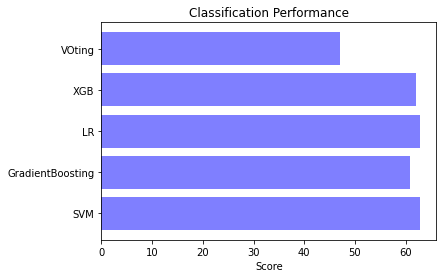

In [119]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score1, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# LIWC

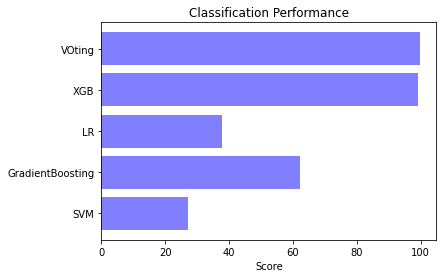

In [120]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score3, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# SPLICE + SNA + LIWC

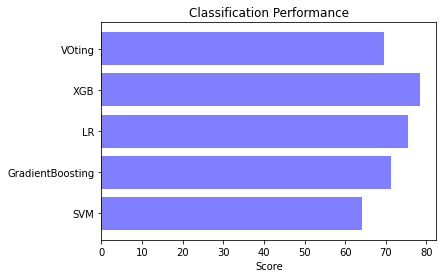

In [121]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score2, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()